In [3]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sets import Set
import calendar
import seaborn as sns
import csvWOD
import falkor_ctd
import copy
import seawater as SW
import os
from mpl_toolkits.basemap import Basemap
from scipy.interpolate import griddata
import scipy.io as sio

# switch to unbuffered output
# we create a class that overrides the write function of a stream object
# in this write function, we call the super write, then we also flush
# the stream -- this has the effect of forcing output to the screen after 
# every write
class Unbuffered(object):
    def __init__(self, stream):
        self.stream = stream
    def write(self, data):
        self.stream.write(data)
        self.stream.flush()
    def __getattr__(self, attr):
        return getattr(self.stream, attr)

import sys
sys.stdout = Unbuffered(sys.stdout)

sns.set()
sns.set_style("darkgrid")
sns.set_context("poster")

%matplotlib inline

In [4]:
def conv_falkor_to_csvWOD(thedata,index,station,latitude,longitude):
    ret_dat = {}
    
    ret_dat['Station'] = station
    ret_dat['Latitude'] = latitude
    ret_dat['Longitude'] = longitude
    ret_dat['Temperatur'] = list(thedata[index['Temperature']])
    ret_dat['Salinity'] = list(thedata[index['Salinity']])
    ret_dat['Oxygen'] = list(thedata[index['Oxygen']])
    #ret_dat['Fluorescence'] = list(thedata[index['Fluorescence']])
    #ret_dat['Turbidity'] = list(thedata[index['Turbidity']])
    ret_dat['Year'] = 2013
    ret_dat['Month'] = 8
    ret_dat['Units'] = ['degrees C','psu','g/kg','m']#,'','']
    ret_dat['Variables'] = ['Temperatur','Salinity','Oxygen','Depth']#,'Fluorescence','Turbidity']
    
    # convert from pressure to depth
    p = thedata[index['Pressure']]
    d = []
    for ii in p:
        d.append(SW.dpth(ii,latitude))
    
    ret_dat['Depth'] = list(d)
    
    return ret_dat

def load_falkor_dat():
    filenames = [f for f in os.listdir(falkor_ctd.DIRECTORY) if (f.startswith('2013-57-00') and f.endswith('avg'))]

    all_casts = []
    for count,filename in enumerate(sorted(filenames)):
        thedata,index,station,lat,lon = falkor_ctd.falkor_ctd_dat(filename)
         
        #print [('[',k,']') for k in lat.split(' ')]
        if len(lat.split(' ')[3]) > 0:
            latitude = float(lat.split(' ')[1]) + float(lat.split(' ')[3])/60.0
        else:
            latitude = float(lat.split(' ')[1]) + float(lat.split(' ')[4])/60.0
        
        #print [('[',k,']') for k in lon.split(' ')]
        if len(lon.split(' ')[2]) > 0:
            longitude = -(float(lon.split(' ')[0]) + float(lon.split(' ')[2])/60.0)
        else:
            longitude = -(float(lon.split(' ')[0]) + float(lon.split(' ')[3])/60.0)
        
        all_casts.append(conv_falkor_to_csvWOD(thedata,index,station,latitude,longitude))
        
    return all_casts
    
def load_NOAA_dat():
    cast_inf = []

    FILES = ['../../5_WOD13_Data/WOD13_004/ocldb1432579402.10924.CTD.csv',
             '../../5_WOD13_Data/WOD13_004/ocldb1432579402.10924.CTD2.csv',
             '../../5_WOD13_Data/WOD13_004/ocldb1432579402.10924.CTD3.csv',
             '../../5_WOD13_Data/WOD13_004/ocldb1432579402.10924.CTD4.csv',
             '../../5_WOD13_Data/WOD13_004/ocldb1432579402.10924.CTD5.csv'
             #'../../5_WOD13_Data/WOD13_004/ocldb1432579402.10924.OSD.csv'
            ]

    for fn in FILES:
        print '-----------------------------------------------------------------'
        print fn
        print '-----------------------------------------------------------------'
        print '> Parsing'
        tmp_casts = []
        tmp_casts = csvWOD.read_casts(fn)
        print '> Done parsing'
        print '> Regionally filtering' # likely don't need this filter 
        #tmp_casts = csvWOD.filter_region(tmp_casts,-160,-120,15,60)
        tmp_casts = csvWOD.filter_variables(tmp_casts,['Temperatur','Salinity','Depth'])
        print '> Done filtering'
        print '> Appending new casts'
        cast_inf.extend(tmp_casts)
        print '> Done' 
        print ''

    print 'Total casts: ', len(cast_inf)
    return cast_inf

def load_all_data():
    print '========================================='
    print ''
    print '            LOADING FALKOR DATA'
    print ''
    print '========================================='
    
    FALKOR_CAST = load_falkor_dat()
    
    print '========================================='
    print ''
    print '            LOADING NOAA DATA'
    print ''
    print '========================================='
    
    NOAA_CAST = load_NOAA_dat()
        
    print 'DONE'
    NOAA_CAST.extend(FALKOR_CAST)
    
    return NOAA_CAST

In [5]:
cast_inf = load_all_data()


            LOADING FALKOR DATA

> reading  2013-57-0002.avg
> reading  2013-57-0003.avg
> reading  2013-57-0004.avg
> reading  2013-57-0005.avg
> reading  2013-57-0006.avg
> reading  2013-57-0007.avg
> reading  2013-57-0008.avg
> reading  2013-57-0009.avg
> reading  2013-57-0010.avg
> reading  2013-57-0011.avg
> reading  2013-57-0012.avg
> reading  2013-57-0013.avg
> reading  2013-57-0014.avg
> reading  2013-57-0015.avg
> reading  2013-57-0016.avg
> reading  2013-57-0017.avg
> reading  2013-57-0018.avg
> reading  2013-57-0019.avg
> reading  2013-57-0020.avg
> reading  2013-57-0021.avg
> reading  2013-57-0022.avg
> reading  2013-57-0023.avg
> reading  2013-57-0024.avg
> reading  2013-57-0025.avg
> reading  2013-57-0026.avg
> reading  2013-57-0027.avg
> reading  2013-57-0028.avg
> reading  2013-57-0029.avg
> reading  2013-57-0030.avg
> reading  2013-57-0031.avg
> reading  2013-57-0032.avg
> reading  2013-57-0033.avg
> reading  2013-57-0034.avg
> reading  2013-57-0035.avg
> reading  201

In [6]:
def get_var_at_depth(cast,dpth,var_nm):
    if max(cast['Depth']) > dpth and min(cast['Depth']) < dpth:
        if var_nm in cast:
            return np.interp(dpth,cast['Depth'],cast[var_nm])
        else:
            print 'Key ', var_nm, ' not found.'
            return np.nan
    else:
        return np.nan
    
def get_all_vars_at_depth(cast_inf,dpth,var_nm):
    all_vars = []
    for cast in cast_inf:
        val = get_var_at_depth(cast,dpth,var_nm)
        if ~np.isnan(val):
            all_vars.append({var_nm : val, 'Latitude' : cast['Latitude'], 'Longitude' : cast['Longitude']})
    return all_vars

def get_grid_data(info,lon_region,lat_region,var_nm):
    x = np.array([k['Longitude'] for k in info])
    y = np.array([k['Latitude'] for k in info])
    z = np.array([k[var_nm] for k in info])

    pts = np.array([x,y]).transpose()

    grid_dat = griddata(pts, z, (lon_region, lat_region), method='linear')
    return grid_dat

def get_depth_surface(info,dpth,var_nm,lon_dat,lat_dat):
    lon_region,lat_region = np.meshgrid(np.linspace(lon_dat[0],lon_dat[1],50),np.linspace(lat_dat[0],lat_dat[1],50))
    dpth_filt = get_all_vars_at_depth(info,dpth,var_nm)
    grid_dat = get_grid_data(dpth_filt,lon_region,lat_region,var_nm)
    
    return (lon_region,lat_region,grid_dat)

def draw_map(lon_region,lat_region):
    bmap = Basemap(projection='merc',llcrnrlon=np.min(lon_region), \
                   urcrnrlon=np.max(lon_region), llcrnrlat=np.min(lat_region), \
                   urcrnrlat=np.max(lat_region),resolution='l')
    
    # draw coastlines, country boundaries, fill continents.
    bmap.drawcoastlines()
    bmap.fillcontinents()
    
    return bmap

def draw_depth_surface(lon_region,lat_region,grid_dat):
    bmap = Basemap(projection='merc',llcrnrlon=np.min(lon_region), \
                   urcrnrlon=np.max(lon_region), llcrnrlat=np.min(lat_region), \
                   urcrnrlat=np.max(lat_region),resolution='l')
    
    # draw the edge of the map projection region (the projection limb)
    # draw lat/lon grid lines every 30 degrees.
    #bmap.drawmeridians(np.arange(np.min(lon_region),np.max(lon_region),2))
    #bmap.drawparallels(np.arange(np.min(lat_region),np.max(lat_region),2))
    # make up some data on a regular lat/lon grid.
    # compute native map projection coordinates of lat/lon grid.
    x, y = bmap(lon_region,lat_region)
    # contour data over the map.
    plt.contourf(x,y,grid_dat.T,cmap='Spectral_r')
    
    # draw coastlines, country boundaries, fill continents.
    bmap.drawcoastlines()
    bmap.fillcontinents()

def getTopo():
    topo=sio.loadmat('/ocean/rirwin/2_FALKOR_Data/3_Repo/topo/SouthVIgrid.mat')
    
    tDat = {'lon' : [], 'lat' : [], 'dpth' : []}
    
    tDat['lon'] = np.squeeze(np.array(topo['SouthVIgrid']['lon'][0][0]))
    tDat['lat'] = np.squeeze(np.array(topo['SouthVIgrid']['lat'][0][0]))
    tDat['dpth'] = np.squeeze(np.array(topo['SouthVIgrid']['depth'][0][0]))
    
    return tDat

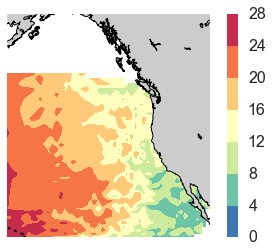

In [64]:
(lon_region,lat_region,grid_dat) = get_depth_surface(cast_inf,5,'Temperatur',[-160,-110],[20,60])

draw_depth_surface(lon_region,lat_region,grid_dat)
plt.colorbar()
plt.show()

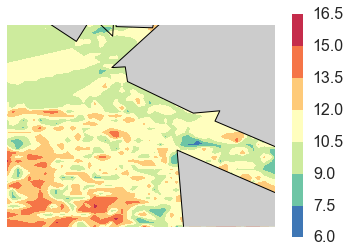

In [65]:
(lon_region,lat_region,grid_dat) = get_depth_surface(cast_inf,5,'Temperatur',[-126,-124],[48,49])

draw_depth_surface(lon_region,lat_region,grid_dat)
plt.colorbar()
plt.show()

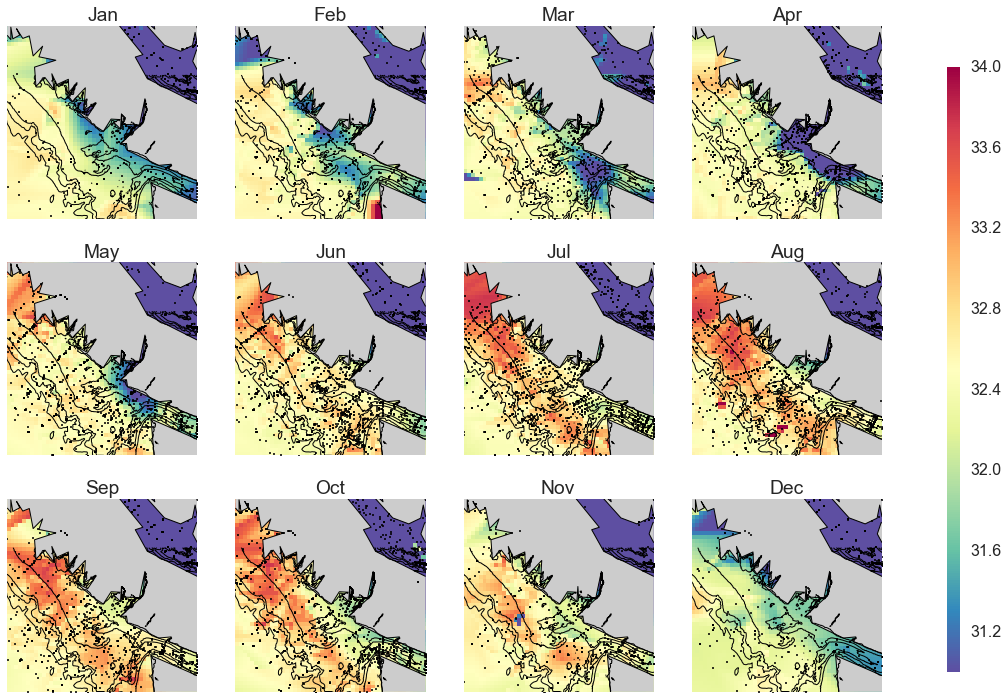

In [10]:
tDat = getTopo()
msh_lon,msh_lat = np.meshgrid(tDat['lon'],tDat['lat'])

fig = plt.figure(figsize=(18,12))
for ii in range(1,13):
    plt.subplot(3,4,ii)
    mnth_inf = csvWOD.filter_month(cast_inf,ii)
    (lon_region,lat_region,grid_dat) = get_depth_surface(mnth_inf,50,'Salinity',[-127,-124],[48,50])
    bmap = draw_map(lon_region,lat_region)
    
    x,y = bmap(lon_region,lat_region)
    #plt.contourf(x,y,grid_dat,np.linspace(31,34,10),cmap='Spectral_r')
    im = plt.pcolormesh(x,y,grid_dat.T,vmin=31,vmax=34,cmap='Spectral_r',shading='interp')
        
    x,y = bmap(msh_lon,msh_lat)
    plt.contour(x,y,tDat['dpth'],levels=[0,-100,-200,-500,-1000],linewidths=1,colors='k',linestyles='-')
    
    cast_lon,cast_lat = bmap([k['Longitude'] for k in mnth_inf],[k['Latitude'] for k in mnth_inf])
    plt.plot(cast_lon,cast_lat,'.k',ms=4)
    plt.title(calendar.month_abbr[ii])

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()

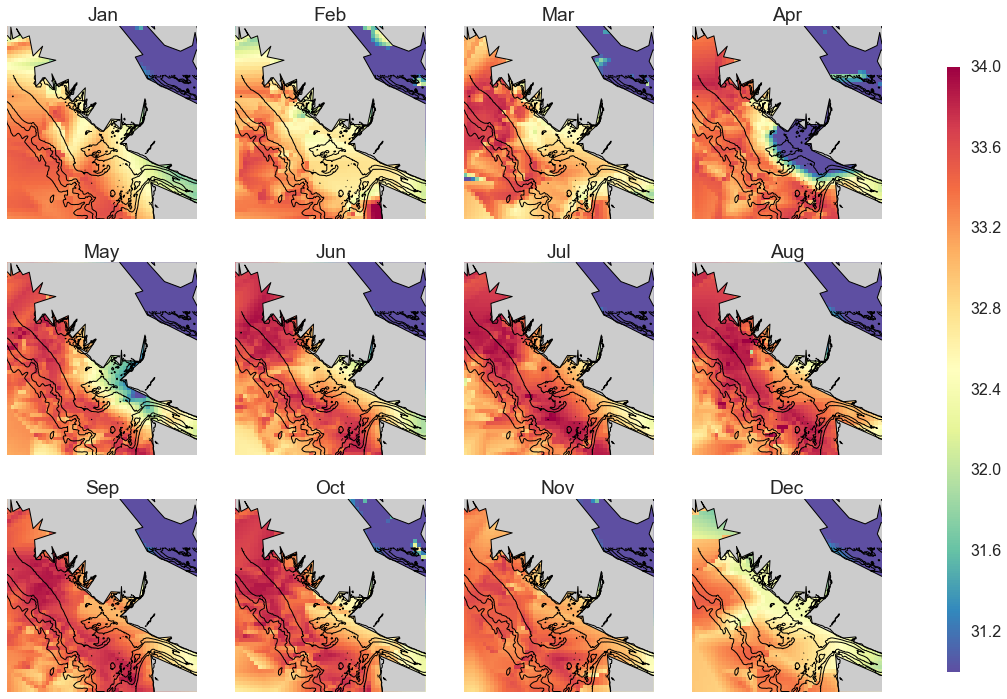

In [74]:
tDat = getTopo()
msh_lon,msh_lat = np.meshgrid(tDat['lon'],tDat['lat'])

fig = plt.figure(figsize=(18,12))
for ii in range(1,13):
    plt.subplot(3,4,ii)
    (lon_region,lat_region,grid_dat) = get_depth_surface(csvWOD.filter_month(cast_inf,ii),100,'Salinity',[-127,-124],[48,50])
    bmap = draw_map(lon_region,lat_region)
    
    x,y = bmap(lon_region,lat_region)
    #plt.contourf(x,y,grid_dat,np.linspace(31,34,10),cmap='Spectral_r')
    im = plt.pcolormesh(x,y,grid_dat.T,vmin=31,vmax=34,cmap='Spectral_r',shading='interp')
        
    x,y = bmap(msh_lon,msh_lat)
    plt.contour(x,y,tDat['dpth'],levels=[0,-100,-200,-500,-1000],linewidths=1,colors='k',linestyles='-')
    plt.title(calendar.month_abbr[ii])

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()

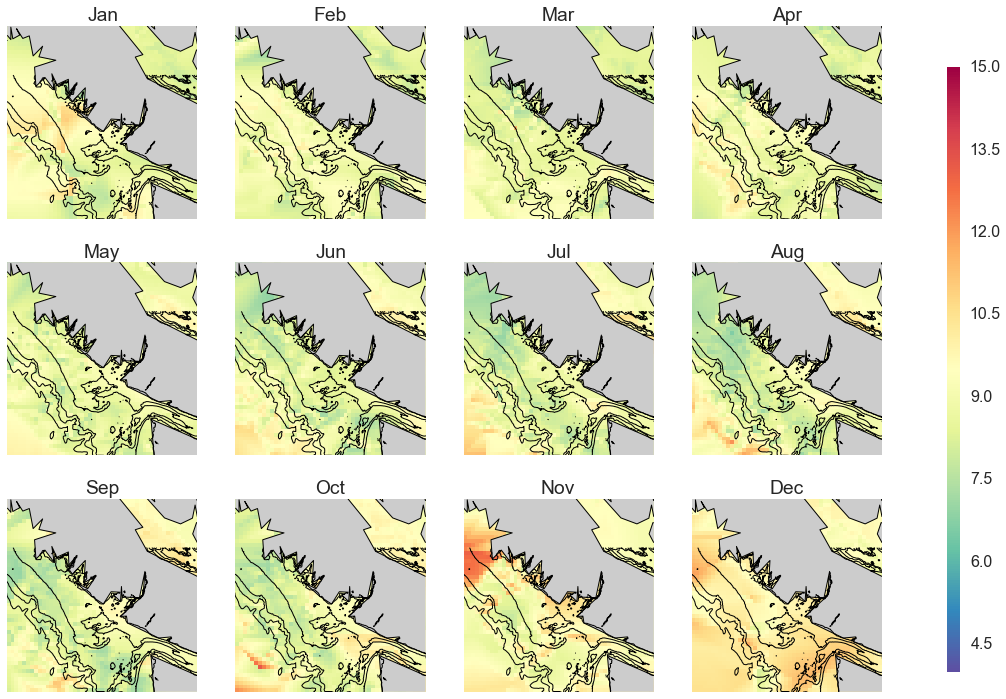

In [76]:
tDat = getTopo()
msh_lon,msh_lat = np.meshgrid(tDat['lon'],tDat['lat'])

fig = plt.figure(figsize=(18,12))
for ii in range(1,13):
    plt.subplot(3,4,ii)
    (lon_region,lat_region,grid_dat) = get_depth_surface(csvWOD.filter_month(cast_inf,ii),50,'Temperatur',[-127,-124],[48,50])
    bmap = draw_map(lon_region,lat_region)
    
    x,y = bmap(lon_region,lat_region)
    #plt.contourf(x,y,grid_dat,np.linspace(31,34,10),cmap='Spectral_r')
    im = plt.pcolormesh(x,y,grid_dat.T,vmin=4,vmax=15,cmap='Spectral_r',shading='interp')
        
    x,y = bmap(msh_lon,msh_lat)
    plt.contour(x,y,tDat['dpth'],levels=[0,-100,-200,-500,-1000],linewidths=1,colors='k',linestyles='-')
    plt.title(calendar.month_abbr[ii])

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()

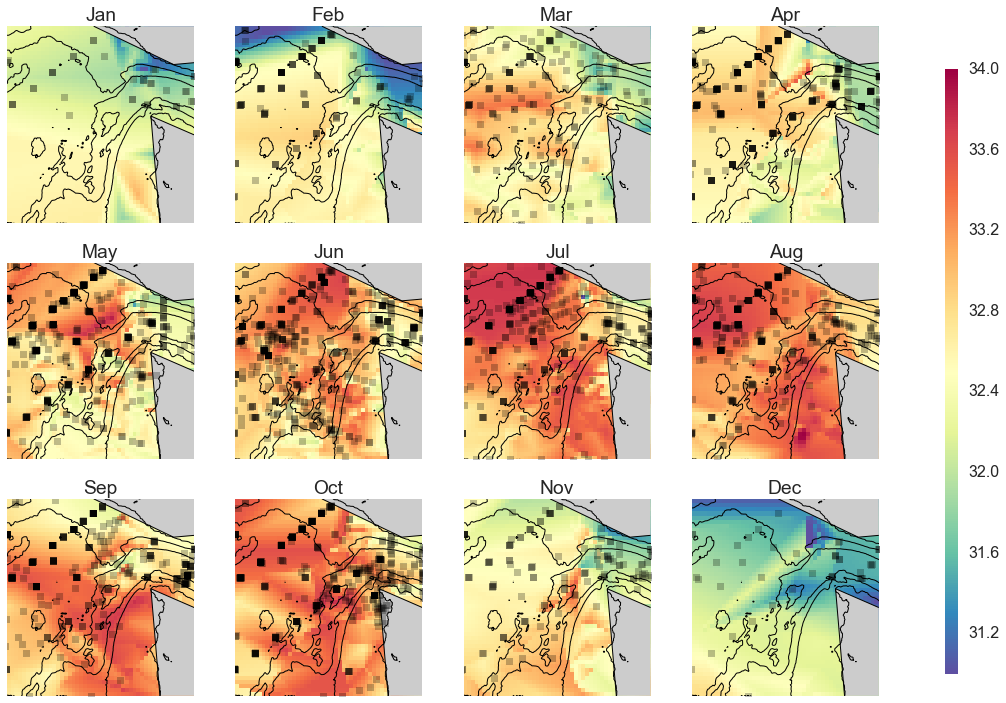

In [13]:
tDat = getTopo()
msh_lon,msh_lat = np.meshgrid(tDat['lon'],tDat['lat'])

fig = plt.figure(figsize=(18,12))
for ii in range(1,13):
    plt.subplot(3,4,ii)
    mnth_inf = csvWOD.filter_month(cast_inf,ii)
    (lon_region,lat_region,grid_dat) = get_depth_surface(mnth_inf,50,'Salinity',[-125.5,-124.5],[48,48.7])
    bmap = draw_map(lon_region,lat_region)
    
    x,y = bmap(lon_region,lat_region)
    #plt.contourf(x,y,grid_dat,np.linspace(31,34,10),cmap='Spectral_r')
    im = plt.pcolormesh(x,y,grid_dat.T,vmin=31,vmax=34,cmap='Spectral_r',shading='interp')
        
    x,y = bmap(msh_lon,msh_lat)
    plt.contour(x,y,tDat['dpth'],levels=[0,-100,-200,-500,-1000],linewidths=1,colors='k',linestyles='-')
    
    cast_lon,cast_lat = bmap([k['Longitude'] for k in mnth_inf],[k['Latitude'] for k in mnth_inf])
    plt.plot(cast_lon,cast_lat,'sk',ms=7,alpha=0.25)
    plt.title(calendar.month_abbr[ii])

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()